In [212]:
### Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import metrics

In [284]:
### Load the dataset

Data = pd.read_csv('M1_final.csv')

In [285]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [286]:
### Drop unused data which has no relationship
Data = Data.drop(columns=['DAY_OF_MONTH','OP_UNIQUE_CARRIER','TAIL_NUM', 'DEST', 'CRS_ELAPSED_TIME','Wind', 'Dew Point', 'Condition','Wind Gust', 'Wind Speed', 'Pressure'])

In [287]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   MONTH        28820 non-null  int64
 1   DAY_OF_WEEK  28820 non-null  int64
 2   DEP_DELAY    28820 non-null  int64
 3   DISTANCE     28820 non-null  int64
 4   CRS_DEP_M    28820 non-null  int64
 5   DEP_TIME_M   28820 non-null  int64
 6   CRS_ARR_M    28820 non-null  int64
 7   Temperature  28820 non-null  int64
 8   Humidity     28820 non-null  int64
 9   sch_dep      28820 non-null  int64
 10  sch_arr      28820 non-null  int64
 11  TAXI_OUT     28820 non-null  int64
dtypes: int64(12)
memory usage: 2.6 MB


Text(0, 0.5, 'TAXI_OUT')

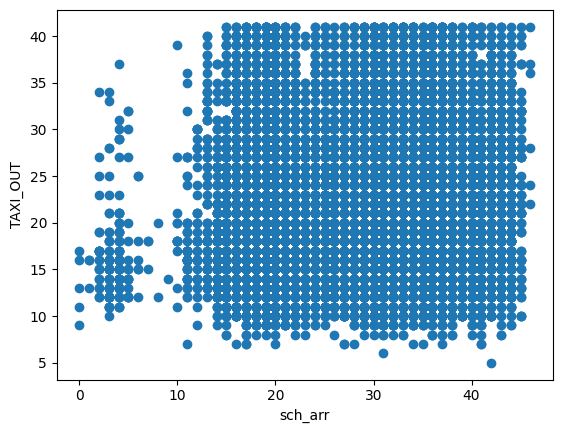

In [288]:
## Exploratory data analysis
## create a scatterplot of the relationship bet. several variables and Taxi_out time

plt.scatter(Data['sch_arr'],Data['TAXI_OUT'])

plt.xlabel('sch_arr')
plt.ylabel('TAXI_OUT')

Text(0, 0.5, 'TAXI_OUT')

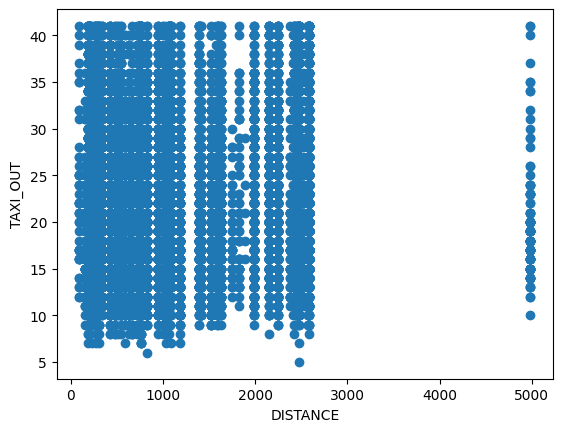

In [289]:
plt.scatter(Data['DISTANCE'],Data['TAXI_OUT'])

plt.xlabel('DISTANCE')
plt.ylabel('TAXI_OUT')

Text(0, 0.5, 'TAXI_OUT')

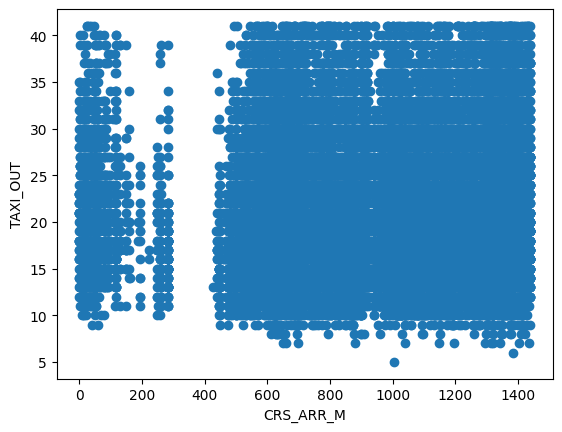

In [290]:
plt.scatter(Data['CRS_ARR_M'],Data['TAXI_OUT'])
plt.xlabel('CRS_ARR_M')
plt.ylabel('TAXI_OUT')

Text(0, 0.5, 'TAXI_OUT')

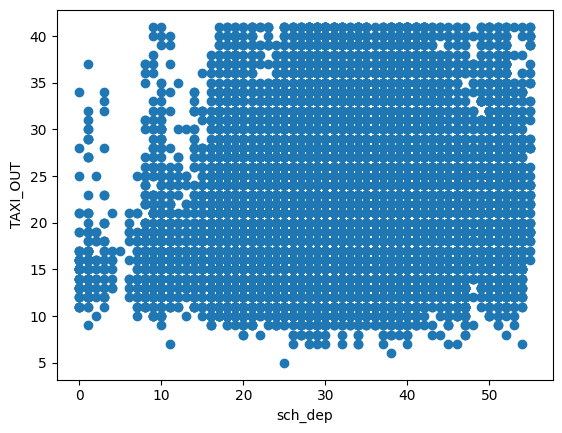

In [291]:
plt.scatter(Data['sch_dep'],Data['TAXI_OUT'])

plt.xlabel('sch_dep')
plt.ylabel('TAXI_OUT')

Text(0, 0.5, 'TAXI_OUT')

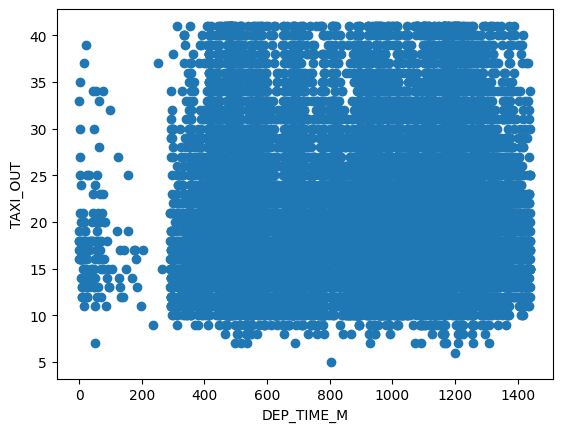

In [292]:
plt.scatter(Data['DEP_TIME_M'],Data['TAXI_OUT'])

plt.xlabel('DEP_TIME_M')
plt.ylabel('TAXI_OUT')

In [293]:
### Select the variables X (independent variable ) & Y (dependent variable)

X = Data.iloc[:, 0:10].values
Y = Data.iloc[ :, 11].values

In [294]:
## train, test, split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 32)

In [295]:
## Train the linear regression model
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [296]:
pred_lin = lin_reg.predict(x_test)

In [297]:
## create a data frame for predictions
pd.DataFrame({'Actual' : y_test, 'Predicted': pred_lin})

,Actual,Predicted
0,23,22.745679
1,14,21.009996
2,22,21.608137
3,19,23.627603
4,20,19.535245
...,...,...
5759,18,20.844806
5760,16,20.856287
5761,34,20.918249
5762,17,18.030082


In [299]:
### MAE
### MSE
### RMSE
### R2
print('MAE:', metrics.mean_absolute_error(y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lin)))
print('R2:', metrics.r2_score(y_test, pred_lin))

MAE: 5.376715980778808
MSE: 45.582225752970764
RMSE: 6.751461008772158
R2: 0.04897471978059764


In [301]:
## LASSO REGRESSION

model_lasso = Lasso(alpha= 1)
model_lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [302]:
pred_lasso = model_lasso.predict(x_test)
pd.DataFrame({'Actual': y_test, 'predicted': pred_lasso})

,Actual,predicted
0,23,22.439778
1,14,21.325832
2,22,21.658526
3,19,23.611605
4,20,19.700900
...,...,...
5759,18,21.068858
5760,16,20.671536
5761,34,20.741965
5762,17,18.187925


In [303]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print('R2:', metrics.r2_score(y_test, pred_lasso))

MAE: 5.389032746022481
MSE: 45.66514574165479
RMSE: 6.7575991107533735
R2: 0.04724468128047299


In [304]:
## Random forest regression
rf_reg = RandomForestRegressor(n_estimators= 100, random_state= 32)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=32)

In [305]:
rf_reg_pred = rf_reg.predict(x_test)
pd.DataFrame({'Actual': y_test, 'predicted': rf_reg_pred})

,Actual,predicted
0,23,24.03
1,14,20.64
2,22,24.48
3,19,18.14
4,20,20.69
...,...,...
5759,18,19.92
5760,16,19.68
5761,34,30.70
5762,17,18.06


In [259]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_reg_pred)))
print('R2:', metrics.r2_score(y_test, rf_reg_pred))

MAE: 4.48324427480916
MSE: 33.055643511450384
RMSE: 5.749403752690394
R2: 0.31032870567403315


In [306]:
##POLYNOMIAL REGRESSIONN
poly_reg = PolynomialFeatures(degree=2)
x_train_2 = poly_reg.fit_transform(x_train)
x_test_2 = poly_reg.transform(x_test)

m_reg = LinearRegression()
m_reg.fit(x_train_2, y_train)


LinearRegression()

In [307]:
m_pred = m_reg.predict(x_test_2)
pd.DataFrame({'Actual': y_test, 'predicted':m_pred})

,Actual,predicted
0,23,21.397705
1,14,21.493025
2,22,22.514996
3,19,23.047324
4,20,18.431300
...,...,...
5759,18,20.217390
5760,16,19.812412
5761,34,21.021826
5762,17,17.827626


In [308]:
print('MAE:', metrics.mean_absolute_error(y_test, m_pred))
print('MSE:', metrics.mean_squared_error(y_test, m_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, m_pred)))
print('R2:', metrics.r2_score(y_test, m_pred))

MAE: 5.2948857132617455
MSE: 44.32288799579602
RMSE: 6.6575436908664765
R2: 0.07524947981312913


In [309]:
# ridge regression
model_ridge = Ridge(alpha = 1, random_state = 32)
model_ridge.fit(x_train, y_train)

Ridge(alpha=1, random_state=32)

In [310]:
pred_ridge = model_ridge.predict(x_test)
pd.DataFrame({'Actual': y_test, 'predicted': pred_ridge})


,Actual,predicted
0,23,22.745678
1,14,21.009997
2,22,21.608135
3,19,23.627604
4,20,19.535246
...,...,...
5759,18,20.844807
5760,16,20.856285
5761,34,20.918249
5762,17,18.030082


In [311]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 5.376716047720083
MSE: 45.58222598943315
RMSE: 6.751461026284099
R2: 0.0489747148470584
